# Importing the Packages

In [1]:
import pandas as pd #data processing
import numpy as np #for arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl #text customization
import itertools #used to iterate over data structures that can be stepped over using a for-loop.

from sklearn.preprocessing import StandardScaler #data normalization
from sklearn.model_selection import train_test_split #data split
from sklearn.tree import DecisionTreeClassifier #decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier #KNN algorithm
from sklearn.linear_model import LogisticRegression #logistic regression algorithm
from sklearn.svm import SVC #SVM algorithm
from sklearn.ensemble import RandomForestClassifier #random forest tree algorithm
from xgboost import XGBClassifier #XGBoost algorithm

from sklearn.metrics import confusion_matrix #evaluation metric
from sklearn.metrics import accuracy_score #evaluation metric
from sklearn.metrics import f1_score #evaluation metric

#IMPORTING DATA

In [2]:
df = pd.read_csv('/content/drive/MyDrive/dataset/credit card fraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#finding missing values in each coloumn
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#distribution of legit and fraud transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#seperating data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
#statistical measures of data

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
#comparing values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [34]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10)))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


#spliting the data into features and targets

In [35]:
X = df.drop(columns='Class',axis=1)
Y = df['Class']

In [36]:
print(X.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [37]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


#splitting data into training and training set

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify = Y,random_state=2)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(284807, 30) (227845, 30) (56962, 30)


#Model Training

**Logistic regression**

In [ ]:
lr = LogisticRegression()
#training the logistic regression Model with Training data 
lr.fit(X_train, Y_train)
lr_test = lr.predict(X_test)

**Decision Tree**



In [41]:
tree_model = DecisionTreeClassifier(max_depth = 4,criterion = 'entropy')
#training the model with training data
tree_model.fit(X_train,Y_train)
tree_test = tree_model.predict(X_test)

**K-Nearest Neighbor**

In [42]:
n=5
knn = KNeighborsClassifier(n_neighbors = n)
#training the model with training data
knn.fit(X_train,Y_train)
knn_test = knn.predict(X_test)

**SVM**

In [43]:
svm = SVC()
#training the model with training data
svm.fit(X_train,Y_train)
svm_test = svm.predict(X_test)

**Random Forest Tree**

In [44]:
rf = RandomForestClassifier(max_depth = 4)
#training the model with training data
rf.fit(X_train,Y_train)
rf_test = rf.predict(X_test)

XGBoost

In [45]:
xgb = XGBClassifier(max_depth = 4)
#training the model with training data
xgb.fit(X_train,Y_train)
xgb_test = xgb.predict(X_test)

#Model Evaluation

**Accuracy Score**

In [46]:
ac_lr = accuracy_score(Y_test,lr_test)
print('Accuracy of Logistic Regression Model is',ac_lr)
ac_dt = accuracy_score(Y_test,tree_test)
print('Accuracy of Decision Tree Model is',ac_dt)
ac_knn = accuracy_score(Y_test,knn_test)
print('Accuracy of K-Nearest Neighbor Model is',ac_knn)
ac_svm = accuracy_score(Y_test,svm_test)
print('Accuracy of SVM Model is',ac_svm)
ac_rf = accuracy_score(Y_test,rf_test)
print('Accuracy of Random Forest Model is',ac_rf)
ac_xgb = accuracy_score(Y_test,xgb_test)
print('Accuracy of XGBoost Model is',ac_xgb)

Accuracy of Logistic Regression Model is 0.9991222218320986
Accuracy of Decision Tree Model is 0.9994733330992591
Accuracy of K-Nearest Neighbor Model is 0.9984551104244935
Accuracy of SVM Model is 0.9982795547909132
Accuracy of Random Forest Model is 0.9993679997191109
Accuracy of XGBoost Model is 0.9995259997893332


**F1 score**

In [48]:
f1_lr = f1_score(Y_test,lr_test)
print('F1 score of Logistic Regression Model is',f1_lr)
f1_dt = f1_score(Y_test,tree_test)
print('F1 score of Decision Tree Model is',f1_dt)
f1_knn = f1_score(Y_test,knn_test)
print('F1 score of K-Nearest Neighbor Model is',f1_knn)
f1_svm = f1_score(Y_test,svm_test)
print('F1 score of SVM Model is',f1_svm)
f1_rf = f1_score(Y_test,rf_test)
print('F1 score of Random Forest Model is',f1_rf)
f1_xgb = f1_score(Y_test,xgb_test)
print('F1 score of XGBoost Model is',f1_xgb)

F1 score of Logistic Regression Model is 0.7282608695652174
F1 score of Decision Tree Model is 0.84375
F1 score of K-Nearest Neighbor Model is 0.1851851851851852
F1 score of SVM Model is 0.0
F1 score of Random Forest Model is 0.797752808988764
F1 score of XGBoost Model is 0.8556149732620321


**Confusion Matrix**

In [49]:
# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
# Compute confusion matrix for the models

tree_matrix = confusion_matrix(Y_test, tree_test, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(Y_test, knn_test, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(Y_test, lr_test, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(Y_test, svm_test, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(Y_test, rf_test, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(Y_test, xgb_test, labels = [0, 1]) # XGBoost

In [51]:
# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

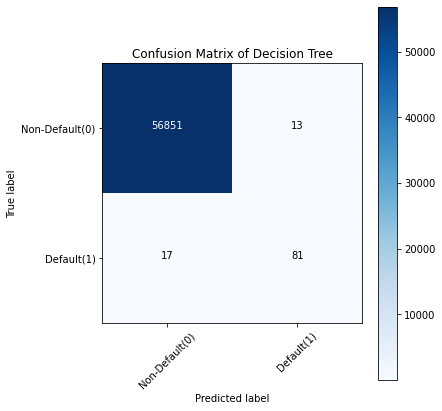

In [52]:
# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

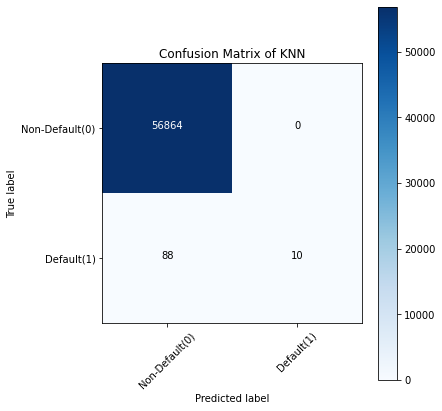

In [53]:
# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

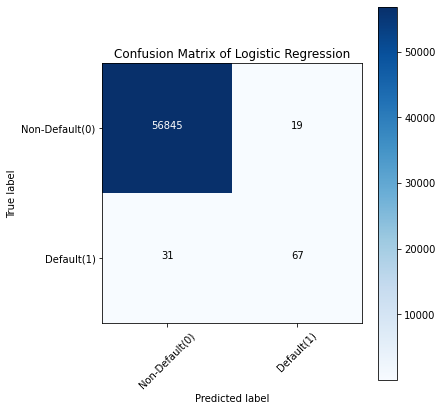

In [54]:
# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

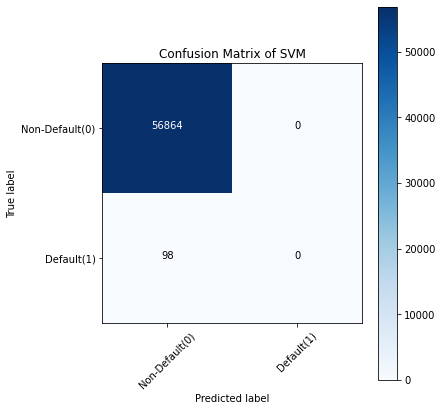

In [55]:
# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

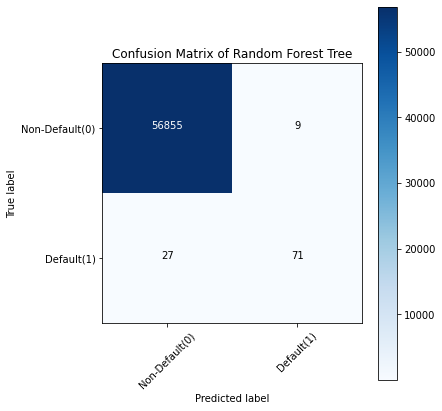

In [56]:
# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

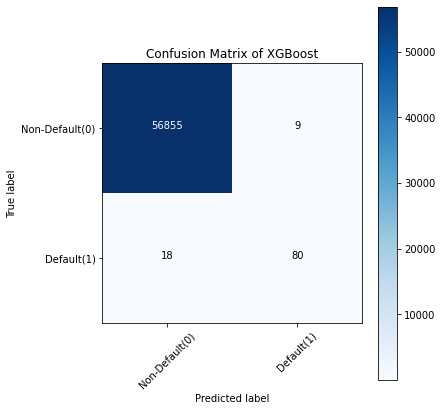

In [57]:
# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()